In [142]:
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns

# Merging

In [108]:
yr2010 = pd.read_csv("data/2010.csv", index_col=0)
yr2011 = pd.read_csv("data/2011.csv", index_col=0)
yr2012 = pd.read_csv("data/2012.csv", index_col=0)
yr2013 = pd.read_csv("data/2013.csv", index_col=0)
yr2014 = pd.read_csv("data/2014.csv", index_col=0)
yr2015 = pd.read_csv("data/2015.csv", index_col=0)
yr2016 = pd.read_csv("data/2016.csv", index_col=0)
yr2017 = pd.read_csv("data/2017.csv", index_col=0)
yr2018 = pd.read_csv("data/2018.csv", index_col=0)
yr2019 = pd.read_csv("data/2019.csv", index_col=0)

dfs = [yr2010,yr2011,yr2012,yr2013,yr2014,yr2015,yr2016,yr2017,yr2018,yr2019]
#Merge all the songs from each year together in one dataframe
all_top_songs = reduce(lambda  left,right: pd.merge(left,right,how='outer'), dfs)
#This creates a column with the values of the index
all_top_songs.reset_index(level=0, inplace=True)
all_top_songs = all_top_songs.rename(columns = {"index": "id"})
all_top_songs.head()

id                 title      artist        top genre  year  bpm  nrgy  \
0   0      Hey, Soul Sister       Train       neo mellow  2010   97    89   
1   1  Love The Way You Lie      Eminem  detroit hip hop  2010   87    93   
2   2               TiK ToK       Kesha        dance pop  2010  120    84   
3   3           Bad Romance   Lady Gaga        dance pop  2010  119    92   
4   4  Just the Way You Are  Bruno Mars              pop  2010  109    84   

   dnce  dB  live  val  dur  acous  spch  pop  
0    67  -4     8   80  217     19     4   83  
1    75  -5    52   64  263     24    23   82  
2    76  -3    29   71  200     10    14   80  
3    70  -4     8   71  295      0     4   79  
4    64  -5     9   43  221      2     4   78

# Data Cleaning

Clean the dataset to make sure the following columns are either integer or floats and not objects:
id, year, bpm, nrgy, dnce, db, live, val, dur, acous, spch, pop

In [65]:
all_top_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         603 non-null    int64 
 1   title      603 non-null    object
 2   artist     603 non-null    object
 3   top genre  603 non-null    object
 4   year       603 non-null    int64 
 5   bpm        603 non-null    int64 
 6   nrgy       603 non-null    int64 
 7   dnce       603 non-null    int64 
 8   dB         603 non-null    int64 
 9   live       603 non-null    int64 
 10  val        603 non-null    int64 
 11  dur        603 non-null    int64 
 12  acous      603 non-null    int64 
 13  spch       603 non-null    int64 
 14  pop        603 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 70.8+ KB


In [81]:
all_top_songs.head()

id                 title      artist        top genre  year  bpm  nrgy  \
0   0      Hey, Soul Sister       Train       neo mellow  2010   97    89   
1   1  Love The Way You Lie      Eminem  detroit hip hop  2010   87    93   
2   2               TiK ToK       Kesha        dance pop  2010  120    84   
3   3           Bad Romance   Lady Gaga        dance pop  2010  119    92   
4   4  Just the Way You Are  Bruno Mars              pop  2010  109    84   

   dnce  dB  live  val  dur  acous  spch  pop  
0    67  -4     8   80  217     19     4   83  
1    75  -5    52   64  263     24    23   82  
2    76  -3    29   71  200     10    14   80  
3    70  -4     8   71  295      0     4   79  
4    64  -5     9   43  221      2     4   78

In [107]:
#Use unique below to inspect  for unique values in different columns
# Variables to check out: id, year, bpm, nrgy, dnce, dB, live, val, dur, acous, spch, pop
#I checked out all the variables above and the last variable that I checked was 'pop'
all_top_songs['pop'].unique()

array([83, 82, 80, 79, 78, 77, 76, 73, 72, 71, 70, 69, 68, 66, 65, 64, 63,
       62, 61, 59, 58, 57, 56, 55, 52, 49, 33,  0, 81, 75, 74, 67, 60, 54,
       50, 46, 38, 31, 28, 27, 25,  7, 88, 85, 51, 45, 43, 42, 41, 36, 35,
       86, 44, 37, 30, 84, 47, 39, 34, 18, 53, 48, 29, 87, 99, 97, 96, 95,
       93, 92, 90], dtype=int64)

All of the variables that were requested to be checked out have integer values. 

# Answers to Questions

**1) Question(Q): What is the most popular song in the database?
Answer(A): 'Memories' by Maroon 5.** I found this answer by sorting all the songs by their popularity(the 'pop' column).

In [100]:
all_top_songs.sort_values(by='pop',ascending=False).head(1)

id     title    artist top genre  year  bpm  nrgy  dnce  dB  live  val  \
572  572  Memories  Maroon 5       pop  2019   91    32    76  -7     8   57   

     dur  acous  spch  pop  
572  189     84     5   99

**2) Q: What artist has the most songs in the dataset?  A: Katy Perry**. I found this by grouping the dataset by the artist and then counting the number of songs produced by each artist. I then sorted the dataset by the artist which had the most unique rows or songs in the database. 

In [104]:
all_top_songs.groupby(['artist']).count().sort_values(by='id', ascending=False).head(1)

id  title  top genre  year  bpm  nrgy  dnce  dB  live  val  dur  \
artist                                                                        
Katy Perry  17     17         17    17   17    17    17  17    17   17   17   

            acous  spch  pop  
artist                        
Katy Perry     17    17   17

**3)Q: What is the most popular genre of music in the dataset? A: dance pop**. I found this by grouping the dataset by genre and then totaling and sorting by the popularity column for each genre. 

In [106]:
all_top_songs.groupby(['top genre']).sum().sort_values(by='pop', ascending=False).head(1)

id    year    bpm   nrgy   dnce    dB  live    val    dur  \
top genre                                                                 
dance pop  94295  658692  38745  23814  21573 -1707  6153  17889  73447   

           acous  spch    pop  
top genre                      
dance pop   3523  2910  21047

**4)Q:Are there any songs in the dataset more than once? A: Yes, there are 19 songs that appear in the dataset at least twice.The list of song titles are below**. I found this by grouping the data by the song title and then sorting by the count of the id for each genre. 

In [112]:
all_top_songs.groupby(['title']).count().sort_values(by='id', ascending=False).head(19)

id  artist  top genre  year  \
title                                                                          
I Like It                                         2       2          2     2   
Written in the Stars (feat. Eric Turner)          2       2          2     2   
Kissing Strangers                                 2       2          2     2   
Just the Way You Are                              2       2          2     2   
We Are Never Ever Getting Back Together           2       2          2     2   
Hello                                             2       2          2     2   
Runnin' (Lose It All)                             2       2          2     2   
Here                                              2       2          2     2   
Say Something                                     2       2          2     2   
Company                                           2       2          2     2   
Sugar                                             2       2          2     2   
Stitches                                          2       2          2     2   
All I Ask                                         2       2          2     2   
Marry You                                         2       2          2     2   
The Hills                                         2       2          2     2   
Love Yourself                                     2       2          2     2   
A Little Party Never Killed Nobody (All We Got)   2       2          2     2   
Castle Walls (feat. Christina Aguilera)           2       2          2     2   
First Time                                        2       2          2     2   

                                                 bpm  nrgy  dnce  dB  live  \
title                                                                        
I Like It                                          2     2     2   2     2   
Written in the Stars (feat. Eric Turner)           2     2     2   2     2   
Kissing Strangers                                  2     2     2   2     2   
Just the Way You Are                               2     2     2   2     2   
We Are Never Ever Getting Back Together            2     2     2   2     2   
Hello                                              2     2     2   2     2   
Runnin' (Lose It All)                              2     2     2   2     2   
Here                                               2     2     2   2     2   
Say Something                                      2     2     2   2     2   
Company                                            2     2     2   2     2   
Sugar                                              2     2     2   2     2   
Stitches                                           2     2     2   2     2   
All I Ask                                          2     2     2   2     2   
Marry You                                          2     2     2   2     2   
The Hills                                          2     2     2   2     2   
Love Yourself                                      2     2     2   2     2   
A Little Party Never Killed Nobody (All We Got)    2     2     2   2     2   
Castle Walls (feat. Christina Aguilera)            2     2     2   2     2   
First Time                                         2     2     2   2     2   

                                                 val  dur  acous  spch  pop  
title                                                                        
I Like It                                          2    2      2     2    2  
Written in the Stars (feat. Eric Turner)           2    2      2     2    2  
Kissing Strangers                                  2    2      2     2    2  
Just the Way You Are                               2    2      2     2    2  
We Are Never Ever Getting Back Together            2    2      2     2    2  
Hello                                              2    2      2     2    2  
Runnin' (Lose It All)                              2    2      2     2    2  
Here                       

**5)Q: Is there a relationship between popularity and danceability? A: There appears to be no relationship between danceability and popularity.** I found this by creating a scatterplot. 

Text(0, 0.5, 'Popularity Score')

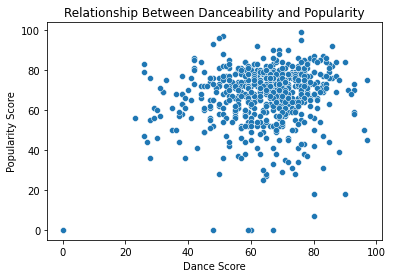

In [121]:
sns.scatterplot(x='dnce', y='pop', data=all_top_songs)
plt.title('Relationship Between Danceability and Popularity')
plt.xlabel('Dance Score')
plt.ylabel('Popularity Score')

**6)Q: Does having a higher bpm lead to having a higher energy score? A: There appears to be no relationship between bpm and energy.** I found this by creating a scatterplot. 

Text(0, 0.5, 'BPM')

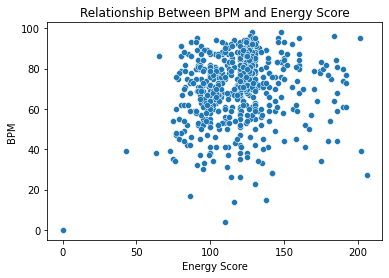

In [124]:
sns.scatterplot(x='bpm',y='nrgy', data=all_top_songs)
plt.title('Relationship Between BPM and Energy Score')
plt.xlabel('Energy Score')
plt.ylabel('BPM')

**7)Q: Which genre has the highest energy score? A: The dance pop genre has the highest energy score.** I found this by grouping the data by genre and then sorting the dataset by the sum of th energy columns. 

In [128]:
all_top_songs.groupby(['top genre']).sum().sort_values(by='nrgy', ascending=False).head(1)

id    year    bpm   nrgy   dnce    dB  live    val    dur  \
top genre                                                                 
dance pop  94295  658692  38745  23814  21573 -1707  6153  17889  73447   

           acous  spch    pop  
top genre                      
dance pop   3523  2910  21047

# Exceeds Expectations Questions:

**1) Export the combined dataset into a CSV called top_spotify_songs.csv**

In [132]:
all_top_songs.to_csv(r"C:\Users\hkv2001\Documents\code\musical_analysis\top_spotify_songs.csv", index=False)

**2)Q:What percentage of songs may have been recorded live? (Consider anything above 50 in the live column to be recorded live) A: 2.98% of the songs may have been recorded live.** I found this by finding the count of the songs that had a live value over 50 and then dividing that number by the total number of songs. Then I multiplied the result by 100%. 

In [138]:
(all_top_songs.loc[all_top_songs['live']>50]['id'].count()/all_top_songs['id'].count())*100

2.9850746268656714

**3)Q:What percentage of songs were acoustic? (Consider anything above 50 in the acoustic column to be acoustic) A: 7.30%**I found this by finding the count of the songs that had a acoustic value over 50 and then dividing that number by the total number of songs. Then I multiplied the result by 100%. 

In [141]:
(all_top_songs.loc[all_top_songs['acous']>50]['id'].count()/all_top_songs['id'].count())*100

7.2968490878938645

**4)Q: Which yearâ€™s songs have the highest amount of spoken word in the song? A: Songs made in the year 2015 have the highest amount of spoken word in the songs**. I found this answer by grouping the songs by year and totaling the spch column. I then sorted the dataset by the speech column to find out which year had the highest amount of spoken word in the songs. 

In [144]:
all_top_songs.groupby(['year']).sum().sort_values(by='spch', ascending=False).head(1)

id    bpm  nrgy  dnce   dB  live   val    dur  acous  spch   pop
year                                                                     
2015  29925  11378  6682  6048 -534  1739  4990  21220   1577   670  6134